In [145]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gender-classification/Transformed Data Set - Sheet1.csv


In [146]:
import pandas as pd

# Load Data 
file_path = "/kaggle/input/gender-classification/Transformed Data Set - Sheet1.csv"
data = pd.read_csv(file_path) 
data.head()


,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [147]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#  LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Scalling "standard scaler"
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#   Splite X& Y        
X = data.drop('Gender', axis=1)
y = data['Gender']

#     Splite data train & Test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)






In [148]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Input

# Build  ANN
model = Sequential()


# Add first layer (input layer )       
model.add(Input(shape=(X_train.shape[1],)))

# Add first layer (hidden layer ) , 64 neural units and Relu function activation       
model.add(Dense(128, activation='relu'))


model.add(Dense(128, activation='relu'))

# Add other (hidden layer ) , 128 neural units and Relu function activation 
model.add(Dense(256, activation='relu'))

# Add other (hidden layer ) , 128 neural units and Relu function activation 
model.add(Dense(256, activation='relu'))

# Add other (hidden layer ) , 128 neural units and Relu function activation 
model.add(Dense(256, activation='relu'))
# Add other (hidden layer ) , 128 neural units and Relu function activation 
model.add(Dense(128, activation='relu'))

# Add output layer only one output  
model.add(Dense(1,activation='sigmoid'))



# Model Summary 
model.summary()


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_89 (Dense)                │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 214,785 (839.00 KB)

 Trainable params: 214,785 (839.00 KB)

 Non-trainable params: 0 (0.00 B)

In [149]:

# Compile the model before training
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [150]:
# Traning Model 
history = model.fit(X_train, y_train, epochs=25, batch_size=10, validation_split=0.2)


Epoch 1/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.3928 - loss: 0.7169 - val_accuracy: 0.4545 - val_loss: 0.6933
Epoch 2/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6584 - loss: 0.6838 - val_accuracy: 0.4545 - val_loss: 0.7138
Epoch 3/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5388 - loss: 0.6864 - val_accuracy: 0.4545 - val_loss: 0.7095
Epoch 4/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5555 - loss: 0.6650 - val_accuracy: 0.4545 - val_loss: 0.6788
Epoch 5/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5068 - loss: 0.6870 - val_accuracy: 0.6364 - val_loss: 0.6686
Epoch 6/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6314 - loss: 0.6760 - val_accuracy: 0.5455 - val_loss: 0.6561
Epoch 7/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5620 - loss: 0.6774 - val_accuracy: 0.6364 - val_loss: 0.6711
Epoch 8/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6655 - loss: 0.6503 - val_accuracy: 0.4545 - val_loss: 0.6814


In [151]:
# Evaluate the model 
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4286 - loss: 1.1510


[1.1509721279144287, 0.4285714328289032]

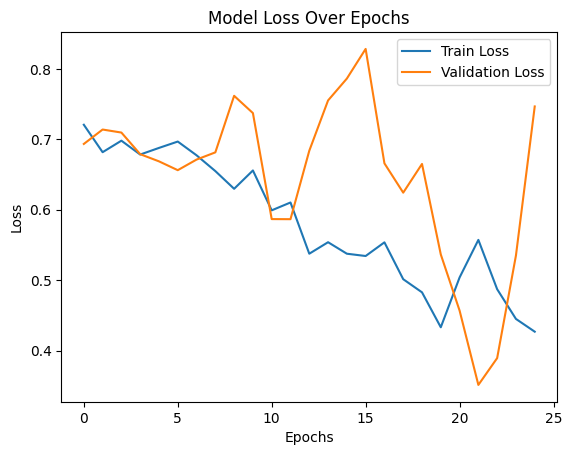

In [152]:
import matplotlib.pyplot as plt
# Plot training & validation loss over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()